In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate , train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix , ConfusionMatrixDisplay , f1_score

In [119]:
df = pd.read_csv('Spam_Ham_data.csv')
df

,email,label,Subject,content
0,b'From exmh-workers-admin@redhat.com Thu Aug ...,0.0,new sequenc window,date wed number aug number number number chri ...
1,b'Return-Path: <Online#3.19578.34-UgGTgZFN19NA...,0.0,cnet newscom cabl compani crack wifi,htmlhead titlec compani crack nametopa logo ad...
2,b'Return-Path: <Online#3.19584.83-p1SYlJ1blFvQ...,0.0,save extra number ipaq number pda cnet shopper,htmlhead newslett hreftopa header tabl widthnu...
3,b'From Steve_Burt@cursor-system.com Thu Aug 2...,0.0,zzzzteana alexand,martin greek sculptor behind plan judg limesto...
4,b'Return-Path: <Online#3.19586.b5-9w0blztbvHPd...,0.0,week deck texedit plu boom,cnet download dispatchmac editionjuli number n...
...,...,...,...,...
3058,b'From 2002biz2biz2513@Flashmail.com Mon Oct ...,1.0,fwddirect market work number,stumbl greatest way market centuri undoubtedli...
3059,b'From biz2biz2446@Flashmail.com Mon Oct 7 2...,1.0,see compani sale sky rocket number,stumbl greatest way market centuri undoubtedli...
3060,b'From bounce2@u-answer.com Tue Oct 8 11:02:...,1.0,number hour watch emmerci joke,frontpag numbermeta nameprogid vlinknumb align...
3061,b'From beautyinfufuxxxmeb13mxy@aol.com Tue Oc...,1.0,make fortun ebay number,htmlbodi tr td p number rate work home busi bf...


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   email    3063 non-null   object 
 1   label    3063 non-null   float64
 2   Subject  3008 non-null   object 
 3   content  3059 non-null   object 
dtypes: float64(1), object(3)
memory usage: 95.8+ KB


In [123]:
df.duplicated().sum()

20

In [125]:
df.drop_duplicates(ignore_index=True , inplace=True)

In [127]:
df.isnull().sum()

email       0
label       0
Subject    55
content     4
dtype: int64

In [129]:
df.dropna(ignore_index=True , inplace=True , axis=0)

In [131]:
df

,email,label,Subject,content
0,b'From exmh-workers-admin@redhat.com Thu Aug ...,0.0,new sequenc window,date wed number aug number number number chri ...
1,b'Return-Path: <Online#3.19578.34-UgGTgZFN19NA...,0.0,cnet newscom cabl compani crack wifi,htmlhead titlec compani crack nametopa logo ad...
2,b'Return-Path: <Online#3.19584.83-p1SYlJ1blFvQ...,0.0,save extra number ipaq number pda cnet shopper,htmlhead newslett hreftopa header tabl widthnu...
3,b'From Steve_Burt@cursor-system.com Thu Aug 2...,0.0,zzzzteana alexand,martin greek sculptor behind plan judg limesto...
4,b'Return-Path: <Online#3.19586.b5-9w0blztbvHPd...,0.0,week deck texedit plu boom,cnet download dispatchmac editionjuli number n...
...,...,...,...,...
2979,b'From 2002biz2biz2513@Flashmail.com Mon Oct ...,1.0,fwddirect market work number,stumbl greatest way market centuri undoubtedli...
2980,b'From biz2biz2446@Flashmail.com Mon Oct 7 2...,1.0,see compani sale sky rocket number,stumbl greatest way market centuri undoubtedli...
2981,b'From bounce2@u-answer.com Tue Oct 8 11:02:...,1.0,number hour watch emmerci joke,frontpag numbermeta nameprogid vlinknumb align...
2982,b'From beautyinfufuxxxmeb13mxy@aol.com Tue Oc...,1.0,make fortun ebay number,htmlbodi tr td p number rate work home busi bf...


In [133]:
x , y = df[['content']] ,  df['label']

## Make Pipeline 

In [136]:
pl = make_pipeline(TfidfVectorizer(stop_words='english') , FunctionTransformer(func=lambda x : x.toarray()) , GaussianNB())

In [138]:
pl

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('functiontransformer',
                 FunctionTransformer(func=<function <lambda> at 0x000002556690DA80>)),
                ('gaussiannb', GaussianNB())])

## Make Cross Validation 

In [141]:
cv = cross_validate(estimator=pl , X = x['content'] , y = y  , cv = 5 , return_train_score=True , scoring=['accuracy' , 'precision','recall','f1'])
cv

{'fit_time': array([1.05089569, 1.29061413, 1.49909711, 1.65164948, 1.87820935]),
 'score_time': array([0.4080441 , 0.39280105, 0.51569629, 0.69450998, 0.54276037]),
 'test_accuracy': array([0.78224456, 0.95477387, 0.9480737 , 0.91959799, 0.81040268]),
 'train_accuracy': array([0.9790532 , 0.97695853, 0.97612065, 0.97612065, 0.99706868]),
 'test_precision': array([0.36216216, 0.90625   , 0.98      , 0.82      , 0.37121212]),
 'train_precision': array([0.86376022, 0.85215054, 0.84759358, 0.84718499, 0.97839506]),
 'test_recall': array([0.84810127, 0.73417722, 0.62025316, 0.5125    , 0.62025316]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'test_f1': array([0.50757576, 0.81118881, 0.75968992, 0.63076923, 0.46445498]),
 'train_f1': array([0.92690058, 0.92017417, 0.91751085, 0.91727141, 0.98907956])}

### Accuracy Score for Train and Test

In [143]:
print(f'Accuracy for Train is : {cv['train_accuracy']}')
print(f'Accuracy for Test is : {cv['test_accuracy']}')
print(f'Mean of Accuracy for Train is : {cv['train_accuracy'].mean()}')
print(f'Mean of Accuracy for Test is : {cv['test_accuracy'].mean()}')

Accuracy for Train is : [0.9790532  0.97695853 0.97612065 0.97612065 0.99706868]
Accuracy for Test is : [0.78224456 0.95477387 0.9480737  0.91959799 0.81040268]
Mean of Accuracy for Train is : 0.9810643428004427
Mean of Accuracy for Test is : 0.8830185603633378


### Recall Score for Train and Test

In [145]:
print(f'Recall for Train is : {cv['train_recall']}')
print(f'Recall for Test is : {cv['test_recall']}')
print(f'Mean of Recall for Train is : {cv['train_recall'].mean()}')
print(f'Mean of Recall for Test is : {cv['test_recall'].mean()}')

Recall for Train is : [1. 1. 1. 1. 1.]
Recall for Test is : [0.84810127 0.73417722 0.62025316 0.5125     0.62025316]
Mean of Recall for Train is : 1.0
Mean of Recall for Test is : 0.6670569620253165


### Precision Score for Train and Test

In [147]:
print(f'Precision for Train is : {cv['train_precision']}')
print(f'Precision for Test is : {cv['test_precision']}')
print(f'Mean of Precision for Train is : {cv['train_precision'].mean()}')
print(f'Mean of Precision for Test is : {cv['test_precision'].mean()}')

Precision for Train is : [0.86376022 0.85215054 0.84759358 0.84718499 0.97839506]
Precision for Test is : [0.36216216 0.90625    0.98       0.82       0.37121212]
Mean of Precision for Train is : 0.877816877365866
Mean of Precision for Test is : 0.6879248566748566


### F1 Score for Train and Test

In [149]:
print(f'F1 for Train is : {cv['train_f1']}')
print(f'F1 for Test is : {cv['test_f1']}')
print(f'Mean of F1 for Train is : {cv['train_f1'].mean()}')
print(f'Mean of F1 for Test is : {cv['test_f1'].mean()}')

F1 for Train is : [0.92690058 0.92017417 0.91751085 0.91727141 0.98907956]
F1 for Test is : [0.50757576 0.81118881 0.75968992 0.63076923 0.46445498]
Mean of F1 for Train is : 0.9341873150215001
Mean of F1 for Test is : 0.6347357396635475


## Make train_test_split to show confusion_matrix for a random state

In [156]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=2 , test_size=0.15 , stratify=y)

In [164]:
pl1 = make_pipeline(TfidfVectorizer(stop_words='english') , FunctionTransformer(func=lambda x : x.toarray()) , GaussianNB())

In [166]:
pl1

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('functiontransformer',
                 FunctionTransformer(func=<function <lambda> at 0x0000025503395760>)),
                ('gaussiannb', GaussianNB())])

In [168]:
pl1.fit(x_train['content'] , y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('functiontransformer',
                 FunctionTransformer(func=<function <lambda> at 0x0000025503395760>)),
                ('gaussiannb', GaussianNB())])

In [170]:
y_train_pred = pl1.predict(x_train['content'])
y_test_pred = pl1.predict(x_test['content'])

### Accuracy

In [176]:
print(f' Accuracy Of Train : {accuracy_score(y_true=y_train , y_pred=y_train_pred)}')
print(f' Accuracy Of Test : {accuracy_score(y_true=y_test , y_pred=y_test_pred)}')

 ACC Of Train : 0.9834384858044164
 ACC Of Test : 0.9151785714285714


### Precision

In [178]:
print(f'Precision Of Train : {precision_score(y_true=y_train , y_pred=y_train_pred)}')
print(f'Precision Of Test : {precision_score(y_true=y_test , y_pred=y_test_pred)}')

Precision Of Train : 0.8891820580474934
Precision Of Test : 0.6521739130434783


### Recall

In [183]:
print(f'Recall Of Train : {recall_score(y_true=y_train , y_pred=y_train_pred)}')
print(f'Recall Of Test : {recall_score(y_true=y_test , y_pred=y_test_pred)}')

Recall Of Train : 1.0
Recall Of Test : 0.7627118644067796


### F1 Score

In [186]:
print(f'F1 Score Of Train : {f1_score(y_true=y_train , y_pred=y_train_pred)}')
print(f'F1 Score Of Test : {f1_score(y_true=y_test , y_pred=y_test_pred)}')

F1 Score Of Train : 0.9413407821229051
F1 Score Of Test : 0.703125


### confusion_matrix

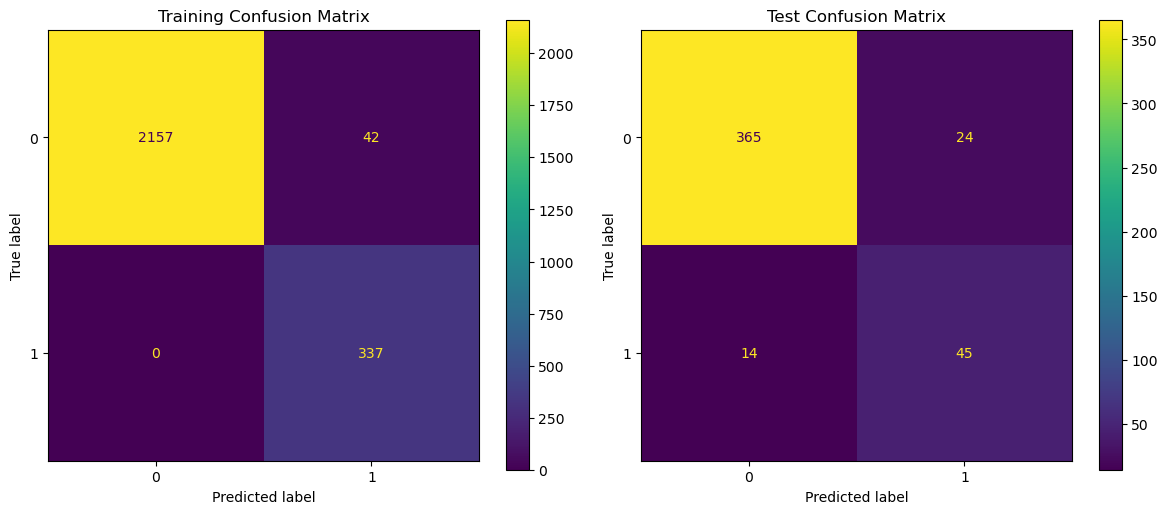

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(confusion_matrix(y_true=y_train, y_pred=y_train_pred)).plot(ax=axes[0])
axes[0].set_title("Training Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_test_pred)).plot(ax=axes[1])
axes[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()